### Plot data for two halves of the experiment
Also, smooth the data, and calculate residuals (waves) and some statistics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a smoothing function
def boxcar_smooth_depth( df, fs=8.0, window_minutes=3.0 ):
    """
    Apply a running-mean (boxcar) filter to depth data.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame with Time and dDepth columns
    fs : float
        Sampling frequency (Hz)
    window_minutes : float
        Window length in minutes

    Returns
    -------
    depth_smooth = numpy array of smoothed data
    """

    # Window length in samples
    N = int(window_minutes * 60 * fs)

    # Boxcar kernel
    kernel = np.ones(N) / N

    # Apply convolution (centered)
    depth_smooth = np.convolve(
        df["Depth"].to_numpy(),
        kernel,
        mode="same"
    )

    half = N // 2
    depth_smooth[:half] = np.nan
    depth_smooth[-half:] = np.nan

    return depth_smooth


In [3]:
# Our value of atmospheric pressure is ?
p_atmos = 10.14901 # decibars - replace with value from our notes
g = 9.80665 # gravitational acceleration (m s^-2)
rhow = 1024 # density of saltwater (kg m^3) - replace with our measured value when we move to saltwater
# offsets from bucket tests...add to the data
y_off = 0.052315299220260306
b_off = 0.038986075190029265
g_off = 0.07080629642164082
r_off = 0.06694348874839333

# Full pathname to location of data file (replace this with correct location on your computer)
data_dir = "/Users/sophiafamely/Documents/ScienceFair2526/"

# file names
yellow_file = "/Users/sophiafamely/Documents/ScienceFair2526/Data/202769_20251109_1251-YELLOW\\202769_20251109_1251-YELLOW_data.txt"
blue_file =   "/Users/sophiafamely/Documents/ScienceFair2526/Data/202771_20251109_1243-BLUE\\202771_20251109_1243-BLUE_data.txt"
green_file = "/Users/sophiafamely/Documents/ScienceFair2526/Data/202772_20251109_1252-GREEN\\202772_20251109_1252-GREEN_data.txt"
red_file =    "/Users/sophiafamely/Documents/ScienceFair2526/Data/202774_20251109_1249-RED\\202774_20251109_1249-RED_data.txt"

In [4]:
import pandas as pd
# Define time bounds - first location
start_time = "2025-11-09 10:05:00"
end_time   = "2025-11-09 10:56:00"

# Use pandas to read each csv file, and convert the time column into an index
# and repeat for all four sensors

# Yellow sensor
df = pd.read_csv(yellow_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + y_off
# rename the dataframe
df_yellow1 = df
df_yellow1["Smoothed Depth"] = boxcar_smooth_depth( df_yellow1, fs=8.0, window_minutes=3.0 ) 

# Blue sensor
df = pd.read_csv(blue_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + b_off
# rename the dataframe
df_blue1 = df
df_blue1["Smoothed Depth"] = boxcar_smooth_depth( df_blue1, fs=8.0, window_minutes=3.0 ) 


# Green sensor
df = pd.read_csv(green_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + g_off
# rename the dataframe
df_green1 = df
df_green1["Smoothed Depth"] = boxcar_smooth_depth( df_green1, fs=8.0, window_minutes=3.0 ) 


# Red sensor
df = pd.read_csv(red_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + r_off
# rename the dataframe
df_red1 = df
df_red1["Smoothed Depth"] = boxcar_smooth_depth( df_red1, fs=8.0, window_minutes=3.0 ) 

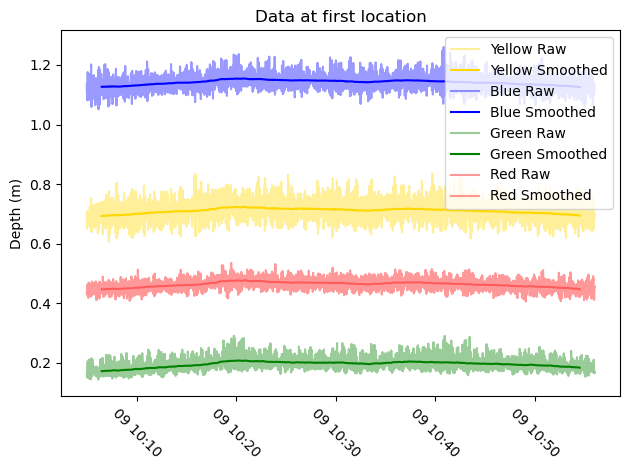

In [5]:
# make a plot of that data
plt.plot( df_yellow1['Time'], df_yellow1['Depth'],c='gold', label = 'Yellow Raw', alpha=0.4)
plt.plot( df_yellow1['Time'], df_yellow1['Smoothed Depth'],c='gold', label = 'Yellow Smoothed')

plt.plot( df_blue1['Time'], df_blue1['Depth'],c='blue', label = 'Blue Raw', alpha=0.4)
plt.plot( df_blue1['Time'], df_blue1['Smoothed Depth'],c='blue', label = 'Blue Smoothed')

plt.plot( df_green1['Time'], df_green1['Depth'],c='green', label = 'Green Raw', alpha=0.4)
plt.plot( df_green1['Time'], df_green1['Smoothed Depth'],c='green', label = 'Green Smoothed')

plt.plot( df_red1['Time'], df_red1['Depth'],c='red', label='Red Raw', alpha=0.4)
plt.plot( df_red1['Time'], df_red1['Smoothed Depth'],c='red', label='Red Smoothed', alpha=0.4)

plt.ylabel( 'Depth (m)' )
plt.xticks(rotation=-45)
plt.legend()
plt.title('Data at first location')
plt.tight_layout()
plt.show()

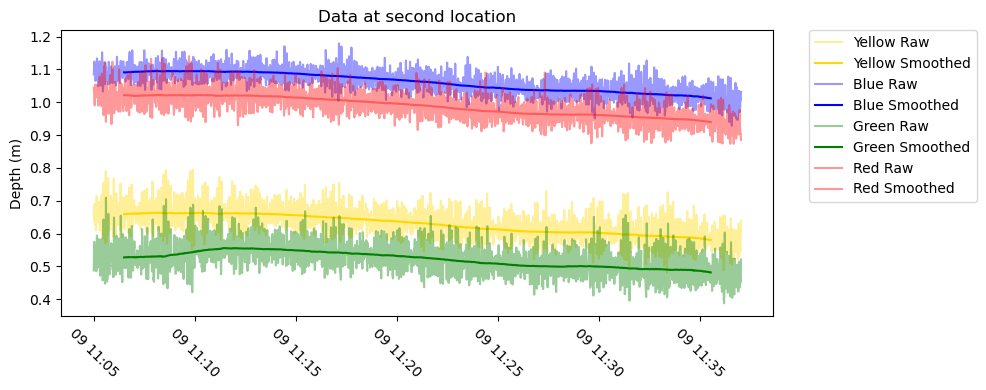

In [6]:
# Define time bounds - second location
start_time = "2025-11-09 11:05:00"
end_time   = "2025-11-09 11:37:00"

# Read each csv file, and convert the time column into an index
# and repeat for all four sensors

# Yellow sensor
df = pd.read_csv(yellow_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + y_off
# rename the dataframe
df_yellow2 = df
df_yellow2["Smoothed Depth"] = boxcar_smooth_depth( df_yellow2, fs=8.0, window_minutes=3.0 ) 

# Blue sensor
df = pd.read_csv(blue_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + b_off
# rename the dataframe
df_blue2 = df
df_blue2["Smoothed Depth"] = boxcar_smooth_depth( df_blue2, fs=8.0, window_minutes=3.0 ) 


# Green sensor
df = pd.read_csv(green_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + g_off
# rename the dataframe
df_green2 = df
df_green2["Smoothed Depth"] = boxcar_smooth_depth( df_green2, fs=8.0, window_minutes=3.0 ) 


# Red sensor
df = pd.read_csv(red_file, parse_dates=['Time'], index_col='Time')
# Making time the index "removes" the 'Time' column...add it back in
df['Time'] = df.index
# Trim the dataset
df = df.loc[start_time:end_time]
# drop the Sea Pressure column
df = df.drop('Sea pressure', axis=1)
# Compute the pressure
df['Depth'] = ( df['Pressure'] - p_atmos )*1e4 / (rhow*g) + r_off
# rename the dataframe
df_red2 = df
df_red2["Smoothed Depth"] = boxcar_smooth_depth( df_red2, fs=8.0, window_minutes=3.0 ) 

# make a plot of that data with some improvements in the plotting
plt.figure( figsize = (10,4) )
plt.plot( df_yellow2['Time'], df_yellow2['Depth'],c='gold', label = 'Yellow Raw', alpha=0.4)
plt.plot( df_yellow2['Time'], df_yellow2['Smoothed Depth'],c='gold', label = 'Yellow Smoothed')

plt.plot( df_blue2['Time'], df_blue2['Depth'],c='blue', label = 'Blue Raw', alpha=0.4)
plt.plot( df_blue2['Time'], df_blue2['Smoothed Depth'],c='blue', label = 'Blue Smoothed')

plt.plot( df_green2['Time'], df_green2['Depth'],c='green', label = 'Green Raw', alpha=0.4)
plt.plot( df_green2['Time'], df_green2['Smoothed Depth'],c='green', label = 'Green Smoothed')

plt.plot( df_red2['Time'], df_red2['Depth'],c='red', label='Red Raw', alpha=0.4)
plt.plot( df_red2['Time'], df_red2['Smoothed Depth'],c='red', label='Red Smoothed', alpha=0.4)

plt.ylabel( 'Depth (m)' )
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Data at second location')
plt.tight_layout()
plt.show()


In [7]:
def residual_stats( df ):

    # Residual
    res = df["Depth"] - df["Smoothed Depth"]
    # add to the dataframe, remove nans
    dfr = df.copy().dropna()
    dfr['Waves'] = res

    # NaN-safe statistics
    mean_s = np.nanmean( dfr['Smoothed Depth'].to_numpy() )
    mean_r = np.nanmean(res)
    std_r  = np.nanstd(res, ddof=1)   # sample standard deviation
    rms_r  = np.sqrt(np.nanmean(res**2))
    print( f"Smoothed Mean: {mean_s:.4f}\nResidual Mean: {mean_r:.4f}\nStd. Dev. {std_r:.4f}\nRMS: {rms_r:.4f}" )

    return dfr


In [8]:
print('Blue')
df_blue1r = residual_stats( df_blue1 )
print('Red')
df_red1r = residual_stats( df_red1 )
print('Yellow')
df_yellow1r = residual_stats( df_yellow1 )
print('Green')
df_green1r = residual_stats( df_green1 )

Blue
Smoothed Mean: 1.1418
Residual Mean: 0.0000
Std. Dev. 0.0238
RMS: 0.0238
Red
Smoothed Mean: 0.4635
Residual Mean: 0.0000
Std. Dev. 0.0166
RMS: 0.0166
Yellow
Smoothed Mean: 0.7107
Residual Mean: 0.0000
Std. Dev. 0.0324
RMS: 0.0324
Green
Smoothed Mean: 0.1957
Residual Mean: 0.0000
Std. Dev. 0.0179
RMS: 0.0179


In [9]:
print('Blue')
df_blue2r = residual_stats( df_blue2 )
print('Red')
df_red2r = residual_stats( df_red2 )
print('Yellow')
df_yellow2r = residual_stats( df_yellow2 )
print('Green')
df_green2r = residual_stats( df_green2 )

Blue
Smoothed Mean: 1.0610
Residual Mean: 0.0002
Std. Dev. 0.0247
RMS: 0.0247
Red
Smoothed Mean: 0.9884
Residual Mean: 0.0001
Std. Dev. 0.0316
RMS: 0.0316
Yellow
Smoothed Mean: 0.6295
Residual Mean: 0.0002
Std. Dev. 0.0361
RMS: 0.0361
Green
Smoothed Mean: 0.5219
Residual Mean: 0.0001
Std. Dev. 0.0385
RMS: 0.0385


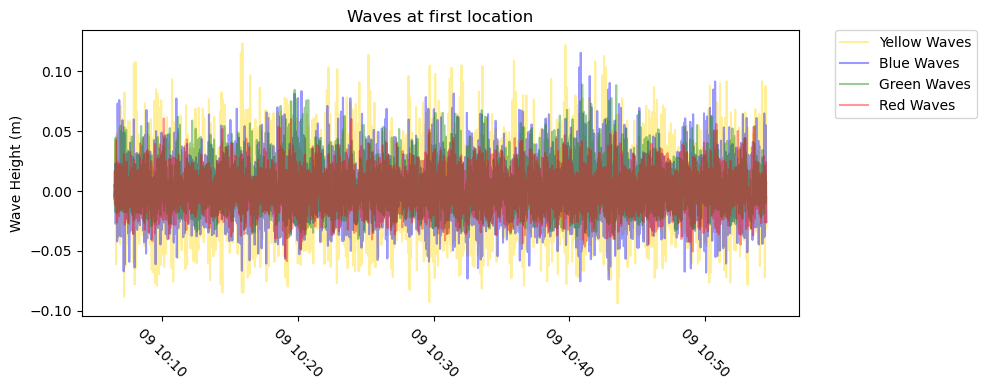

In [10]:
# plot waves only
plt.figure( figsize = (10,4) )
plt.plot( df_yellow1r['Time'], df_yellow1r['Waves'],c='gold', label = 'Yellow Waves', alpha=0.4)
plt.plot( df_blue1r['Time'], df_blue1r['Waves'],c='blue', label = 'Blue Waves', alpha=0.4)
plt.plot( df_green1r['Time'], df_green1r['Waves'],c='green', label = 'Green Waves', alpha=0.4)
plt.plot( df_red1r['Time'], df_red1r['Waves'],c='red', label = 'Red Waves', alpha=0.4)


plt.ylabel( 'Wave Height (m)' )
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Waves at first location')
plt.tight_layout()
plt.show()

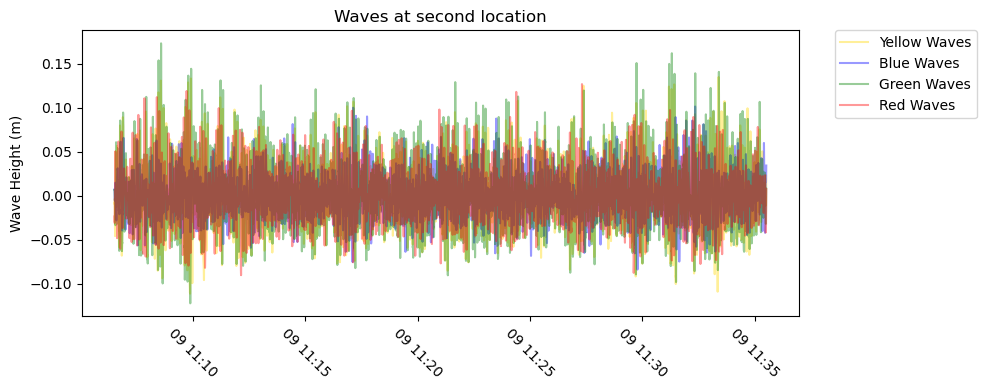

In [11]:
# plot waves only
plt.figure( figsize = (10,4) )
plt.plot( df_yellow2r['Time'], df_yellow2r['Waves'],c='gold', label = 'Yellow Waves', alpha=0.4)
plt.plot( df_blue2r['Time'], df_blue2r['Waves'],c='blue', label = 'Blue Waves', alpha=0.4)
plt.plot( df_green2r['Time'], df_green2r['Waves'],c='green', label = 'Green Waves', alpha=0.4)
plt.plot( df_red2r['Time'], df_red2r['Waves'],c='red', label = 'Red Waves', alpha=0.4)


plt.ylabel( 'Wave Height (m)' )
plt.xticks(rotation=-45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Waves at second location')
plt.tight_layout()
plt.show()